In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = pd.read_excel('tugas_week4.xlsx')
df

,nama,nim,angkatan,gender,tinggi_badan,berat_badan,ipk
0,imad,6008,2016,M,156,56,3.75
1,budi,7215,2017,M,157,67,3.15
2,setiawan,7114,2017,M,176,87,2.98
3,sifa,8435,2018,F,176,67,3.05
4,safi,8306,2018,F,165,55,3.65
5,abdul,8010,2018,M,156,87,3.55
6,maimunah,6164,2016,F,177,67,3.98
7,bukhori,7243,2017,M,187,67,3.54
8,somad,7109,2017,M,178,87,2.87
9,indira,8444,2018,F,187,67,2.55


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nama          12 non-null     object 
 1   nim           12 non-null     int64  
 2   angkatan      12 non-null     int64  
 3   gender        12 non-null     object 
 4   tinggi_badan  12 non-null     int64  
 5   berat_badan   12 non-null     int64  
 6   ipk           12 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 640.0+ bytes


In [40]:
df = df.filter(["tinggi_badan", "berat_badan"])

In [41]:
df

,tinggi_badan,berat_badan
0,156,56
1,157,67
2,176,87
3,176,67
4,165,55
5,156,87
6,177,67
7,187,67
8,178,87
9,187,67


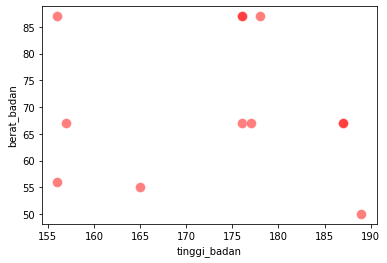

In [42]:
sns.scatterplot(x="tinggi_badan", y="berat_badan", data=df, s=100, color="red", alpha = 0.5)

In [43]:
x_array = np.array(df)
print(x_array)

[[156  56]
 [157  67]
 [176  87]
 [176  67]
 [165  55]
 [156  87]
 [177  67]
 [187  67]
 [178  87]
 [187  67]
 [176  87]
 [189  50]]


In [44]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.        , 0.16216216],
       [0.03030303, 0.45945946],
       [0.60606061, 1.        ],
       [0.60606061, 0.45945946],
       [0.27272727, 0.13513514],
       [0.        , 1.        ],
       [0.63636364, 0.45945946],
       [0.93939394, 0.45945946],
       [0.66666667, 1.        ],
       [0.93939394, 0.45945946],
       [0.60606061, 1.        ],
       [1.        , 0.        ]])

In [45]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [46]:
print(kmeans.cluster_centers_)

[[0.1010101  0.25225225]
 [0.62626263 1.        ]
 [1.         0.        ]
 [0.78030303 0.45945946]
 [0.         1.        ]]


In [47]:
print(kmeans.labels_)
df["kluster"] = kmeans.labels_
df.head()

[0 0 1 3 0 4 3 3 1 3 1 2]


,tinggi_badan,berat_badan,kluster
0,156,56,0
1,157,67,0
2,176,87,1
3,176,67,3
4,165,55,0


In [48]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 100,
c = df.kluster, marker = "o", alpha = 0.5), centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c="blue", s=200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Tinggi Badan")
plt.ylabel("Scaled Berat Badan");plt.show()

SyntaxError: cannot assign to function call (<ipython-input-48-849d03354b95>, line 2)